In [13]:
import torch
import torchvision

from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

Download MNIST

In [14]:
dataset = MNIST(root='data/', download=True)

Get test dataset only

In [5]:
print(len(dataset))

test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

60000
10000


In [6]:
test_dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F180426F908>, 7)

MNIST we download are PIL.Image object
Though we can Display it
however we can't just put into learning model

Label: 5


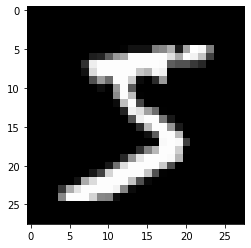

In [15]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

## torchvision.transforms
make the MNIST PIL.image object to value data(tensors)

In [8]:
import torchvision.transforms as transforms

dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


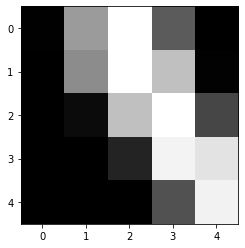

In [10]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Split dataset to 3 parts
1. Training set
2. Validation set
3. Testing Set

## Split validation and training by hand
And we shuffle the data first(by index)

In [16]:
import numpy as np

def spilit_indices(n, val_percent):

    validation_n = int(val_percent * n)

    # just shuffle the list of [0,1,...,n-1]
    idxs = np.random.permutation(n)

    # [n : ] skip first n
    # [ : n] from 0 to n
    return idxs[validation_n:], idxs[:validation_n]

In [17]:
train_indices, validation_indices = spilit_indices(len(dataset), val_percent=0.2)

print(len(train_indices), len(validation_indices))
print('Smaple validation indices: ', validation_indices[:20])

48000 12000
Smaple validation indices:  [47934 57847 44800 34045 20930 41003  1623 40481 54629 14096 22280 31671
   340 59896 27401 38173  8357 22344  6699 10935]


`SubsetRandomSampler` using indices to sample data
and randomly, so the shuffle indices might be redundant.

In [25]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 100

# Combine sampler(using indices) and data loader
# Training
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)

# Validation
val_sampler = SubsetRandomSampler(validation_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler=val_sampler)

## split data using utils
`torch.utils.data.random_split`

can split dataset into validation set and training set as well

In [11]:
# Spliting Training and Validation datasets
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [12]:
# DataLoader
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle=True)